## 🧠 Ejercicio Avanzado: Planificación de Rutas de Entrega

Una empresa de logística realiza entregas entre distintas ciudades del Ecuador. Las ciudades están conectadas por rutas con costos asociados que representan el **precio del combustible + peajes** en USD. El gerente desea conocer la **ruta más económica** para enviar mercancía desde **Ibarra** hasta **Loja**, pasando por al menos una ciudad costera.

### 📍 Ciudades:
- Ibarra
- Quito
- Santo Domingo
- Manta (costera)
- Portoviejo (costera)
- Guayaquil (costera)
- Cuenca
- Loja

### 🛣️ Conexiones y costos (USD):
- Ibarra → Quito: 10
- Quito → Santo Domingo: 15
- Quito → Manta: 30
- Santo Domingo → Manta: 12
- Manta → Portoviejo: 5
- Portoviejo → Guayaquil: 20
- Guayaquil → Cuenca: 25
- Cuenca → Loja: 18
- Quito → Cuenca: 35
- Santo Domingo → Guayaquil: 22
- Guayaquil → Loja: 40

---
### 🎯 Objetivos del estudiante
- Representar el grafo dirigido y ponderado.
- Visualizar el grafo con `networkx`.
- Usar `dijkstra_path` para determinar el **camino más económico desde Ibarra hasta Loja**, verificando que **pase por al menos una ciudad costera** (`Manta`, `Portoviejo`, o `Guayaquil`).
- Mostrar el recorrido y el costo total.

💡 *Sugerencia:* Puedes comprobar si una ciudad costera está incluida en el camino usando una intersección de conjuntos en Python.

## Rúbrica de Evaluación: Ejercicio de Logística con Grafos

| Criterio Evaluado                                                                 | Puntaje Máximo |
|----------------------------------------------------------------------------------|----------------|
| Creación correcta del grafo con nodos y aristas                              | 20 puntos      |
| Asignación correcta de pesos (costos) a todas las conexiones                 | 15 puntos      |
| Visualización clara y bien etiquetada del grafo usando `networkx` y `matplotlib` | 20 puntos      |
| Cálculo correcto del camino más barato con `dijkstra_path`                   | 15 puntos      |
| Verificación de que el camino pase por al menos una ciudad costera          | 10 puntos      |
| Interpretación correcta del resultado (camino y costo total)                 | 10 puntos      |
| Claridad del código, comentarios y estilo                                    | 10 puntos      |
| **Total**                                                                       | **100 puntos** |

**Nota:** Se valorará la creatividad, la correcta identificación de ciudades, el uso adecuado de funciones de `networkx` y la legibilidad del código.


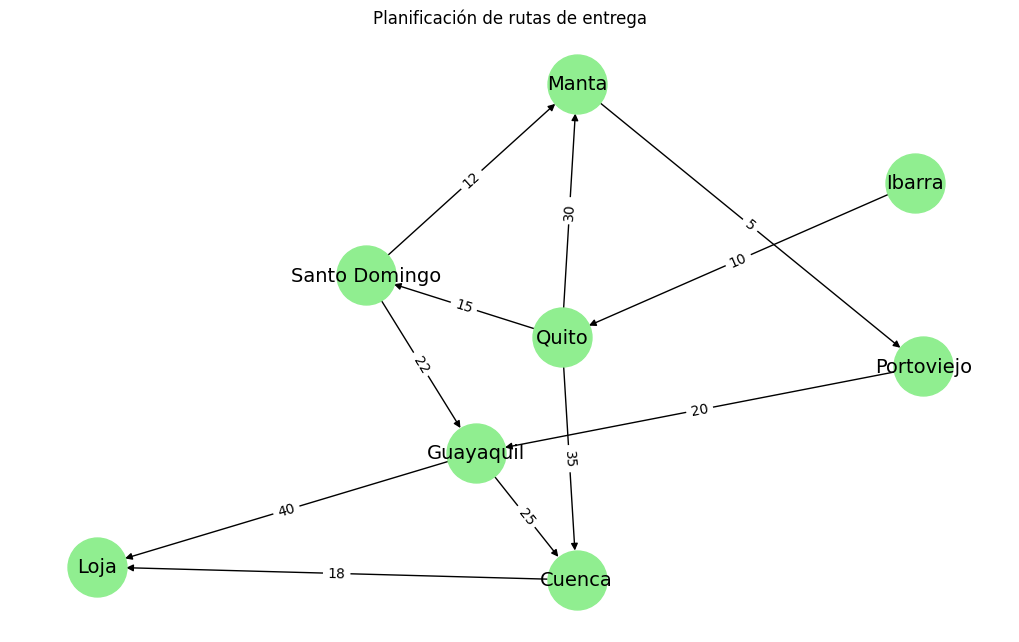


CAMINO MAS CORTO SIN PASAR POR CIUDAD COSTERA

Camino = Ibarra-Quito-Cuenca-Loja
Costo: 63

CAMINO MAS CORTO PASANDO POR CIUDAD COSTERA

Camino: Ibarra-Quito-Santo Domingo-Guayaquil-Loja
Costo: 87


In [38]:
# Importamos las librerías necesarias para grafo y visualización
import matplotlib.pyplot as plt
import networkx as nx

# Definimos las ciudades costeras
CIUDADES_COSTERAS = ["Manta", "Portoviejo", "Guayaquil"]
CAMINOS = []

# Creamos el grafo dirigido
G = nx.DiGraph()

# Añadimos las aristas con sus respectivos pesos (costos)
G.add_edge("Ibarra", "Quito", weight=10)
G.add_edge("Quito", "Santo Domingo", weight=15)
G.add_edge("Quito", "Manta", weight=30)
G.add_edge("Santo Domingo", "Manta", weight=12)
G.add_edge("Manta", "Portoviejo", weight=5)
G.add_edge("Portoviejo", "Guayaquil", weight=20)
G.add_edge("Guayaquil", "Cuenca", weight=25)
G.add_edge("Cuenca", "Loja", weight=18)
G.add_edge("Quito", "Cuenca", weight=35)
G.add_edge("Santo Domingo", "Guayaquil", weight=22)
G.add_edge("Guayaquil", "Loja", weight=40)

# Definimos la posición de los nodos para la visualización
pos = nx.spring_layout(G, seed=42, k=1.5)

# Dibujamos el grafo
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_color="lightgreen", node_size=1800, font_size=14, arrows=True)

# Mostramos los pesos encima de las aristas
labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# Título y ajustes de la gráfica
plt.title("Planificación de rutas de entrega")
plt.axis("off")
plt.show()

# Calculamos el camino más corto (económico) de Ibarra a Loja sin restricción
camino = nx.dijkstra_path(G, source="Ibarra", target="Loja")
costo = nx.dijkstra_path_length(G, source="Ibarra", target="Loja")

# Mostramos resultados del camino más corto sin restricción de ciudad costera
print("\nCAMINO MAS CORTO SIN PASAR POR CIUDAD COSTERA\n")
print(f"Camino = {'-'.join(camino)}")
print(f"Costo: {costo}")

print("\nCAMINO MAS CORTO PASANDO POR CIUDAD COSTERA\n")

# Buscamos el camino más barato que pase por al menos una ciudad costera
for ciudad in CIUDADES_COSTERAS:
    # Camino de Ibarra a la ciudad costera
    camino_costero = nx.dijkstra_path(G, source="Ibarra", target=ciudad)
    # Camino de la ciudad costera a Loja
    camino = nx.dijkstra_path(G, source=ciudad, target="Loja")
    # Unimos ambos caminos (evitando duplicar la ciudad costera)
    camino_total = camino_costero + camino[1:]
    camino_total = "-".join(camino_total)
    # Calculamos el costo total
    costo_costero = nx.dijkstra_path_length(G, source="Ibarra", target=ciudad)
    costo = nx.dijkstra_path_length(G, source=ciudad, target="Loja")
    costo_total = costo_costero + costo
    # Guardamos el camino y su costo en la lista
    diccionario = {camino_total: costo_total}
    CAMINOS.append(diccionario)

# Buscamos el camino de menor costo entre los que pasan por ciudad costera
clave_menor = list(CAMINOS[0].values())[0]
posicion_menor = 0
for i in range(3):
    clave = list(CAMINOS[i].values())[0]
    if clave < clave_menor:
        clave_menor = clave
        posicion_menor = i

# Mostramos el mejor camino y su costo
print(f"Camino: {list(CAMINOS[posicion_menor].keys())[0]}")
print(f"Costo: {list(CAMINOS[posicion_menor].values())[0]}")

